In [0]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt  # to plot
import matplotlib as mpl
%matplotlib inline  


<img src="SA.png">

In [0]:
def annealing(estado_inicial,funcion_costo,siguiente_estado,acceptance_probability,temp_inicial,temp_decrease_factor,maxsteps=50,debug=True):
    
    """ 
    Params:
        estado_inicial -> Función que genera solución inicial
        funcion_costo -> Función de costo
        siguiente_estado -> Función que genera el siguiente estado que se puede obtener a partir del anterior
        acceptance -> Función de distribución de probabilidad
        temp_inicial -> Parametro, temperatura inicial
        temp_decrease_factor -> Parametro, factor de decrecimiento de temperatura [0.8- 0.98]
        maxsteps -> Número de interaciones por temperatura
        debug -> Debug Mode
            
    """
    state = estado_inicial()
    cost = funcion_costo(state)
    states, costs = [state], [cost]
    num_accep = []
    T = temp_inicial
    while T > 0.01:
        aceptances = 0
        for step in range(maxsteps):
            new_state = siguiente_estado(state)
            new_cost = funcion_costo(new_state)
            if acceptance_probability(cost, new_cost, T) > rn.random():
                state, cost = new_state, new_cost
                states.append(state[:])
                costs.append(cost)
                aceptances += 1
                
        if debug: print("Temp : {}, state = {}, cost = {}".format(T, state, cost))
        T *= temp_decrease_factor
        num_accep.append(aceptances)
        
    best_sol_index = costs.index(min(costs))
    print("Mejor indice:", best_sol_index, "Mejor costo:",costs[best_sol_index], "Mejor estado:", states[best_sol_index])
    return states[best_sol_index], costs[best_sol_index], states, costs, num_accep

<h3>Ejemplo 1: minimizar la función (5/2)+x**2 en el intervalo [-250,250]</h3>

In [0]:
def cost_function(x):
    """ Función de costo Ejemplo 1"""
    return (5/2.0)+x**2

In [0]:
def algoritmo_metropolis(cost, new_cost, temperature):
    """ Función de probabilidad de aceptación Ejemplo 1"""
    if new_cost < cost:
        return 1
    else:
        p = np.exp(- (new_cost - cost) / temperature) # Función de probabilidad e Boltzman
        return p

<img src="DistProBoltzman.png">

In [0]:
intervalo = [-250, 250]
def estado_inicial():
    """ Punto aleatorio en el intervalo """
    a, b = intervalo
    return a + (b - a) * rn.random_sample()

In [0]:
def siguiente_estado(x):
    """ Moverlo un poco hacia cualquier dirección"""
    delta =  rn.random_sample() #Return random floats in the half-open interval [0.0, 1.0).
    if rn.random_sample() > 0.5:
        delta = -delta 
    new_state = x + delta
    #Debe estar en el intervalo
    a, b = intervalo
    new_state = max(min(new_state, b), a)
    return new_state

In [0]:
state, c, states, costs, num_accep = annealing(estado_inicial, cost_function, siguiente_estado, algoritmo_metropolis, 
          temp_inicial= 1000, temp_decrease_factor = 0.8, maxsteps=30, debug=False)
state, c

(0.0007163363779189025, 2.5000005131378065)

In [0]:
def see_annealing(states, costs, num_accep):
    plt.figure()
    plt.subplot(311)
    plt.plot(states, 'r')
    plt.title("Estados/Soluciones")
    plt.subplot(312)
    plt.plot(costs, 'b')
    plt.title("Costo")
    plt.subplot(313)
    plt.plot(num_accep, 'b')
    plt.title("Probabilidad de aceptación")
    plt.tight_layout()
    plt.show()

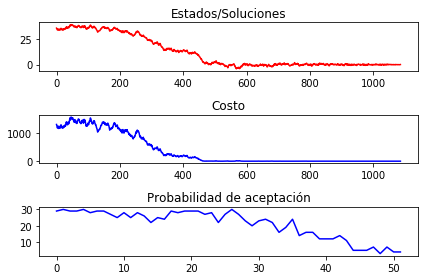

In [0]:
see_annealing(states, costs, num_accep)

<h3>Ejercicio: Ahora las N Reinas</h3>

In [0]:
n = 8
def estado_inicial_reinas():
    """ Descrp """
    return [i for i in range(n)]

In [0]:
def cost_function_reinas(x):
    """ Función de costo reinas"""
    collisions = 0
    for item in x:
        item_index = x.index(item)
        for elem in x:
            elem_index = x.index(elem)
            if item_index != elem_index:
                if item - (elem_index - item_index) == elem or (elem_index - item_index) + item == elem:
                    collisions += 1
    if collisions == 0:
        print("Se encontro sol 0 col.:",x)
    return collisions

In [0]:
def siguiente_estado_reinas(x):
    num_cambios = len(x)
    for i in range(num_cambios):
        index1 = rn.randint(len(x)-1)
        index2 = rn.randint(len(x)-1)
        x[index1], x[index2] = x[index2], x[index1]
    return x
    

Se encontro sol 0 col.: [3, 6, 4, 1, 5, 0, 2, 7]
Se encontro sol 0 col.: [5, 3, 6, 0, 2, 4, 1, 7]
Se encontro sol 0 col.: [5, 3, 6, 0, 2, 4, 1, 7]
Se encontro sol 0 col.: [5, 3, 6, 0, 2, 4, 1, 7]
Se encontro sol 0 col.: [5, 2, 4, 6, 0, 3, 1, 7]
Mejor indice: 610 Mejor costo: 0 Mejor estado: [3, 6, 4, 1, 5, 0, 2, 7]


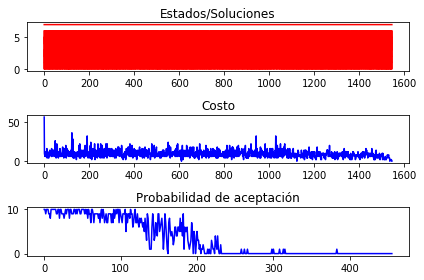

In [0]:
state, c, states, costs, num_accep  = annealing(estado_inicial_reinas, cost_function_reinas, siguiente_estado_reinas, algoritmo_metropolis, 
          temp_inicial= 100, temp_decrease_factor = 0.98, maxsteps=10, debug=False)
see_annealing(states,costs,num_accep)

<h3>Taller en clase: No entregable</h3>

<h4>Solucione el problema de la Mochila con SA</h4>